<a href="https://colab.research.google.com/github/vxxhnuuu/Customer-Segmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift , estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


#Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df.iloc[: , [3,4]].values

#Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

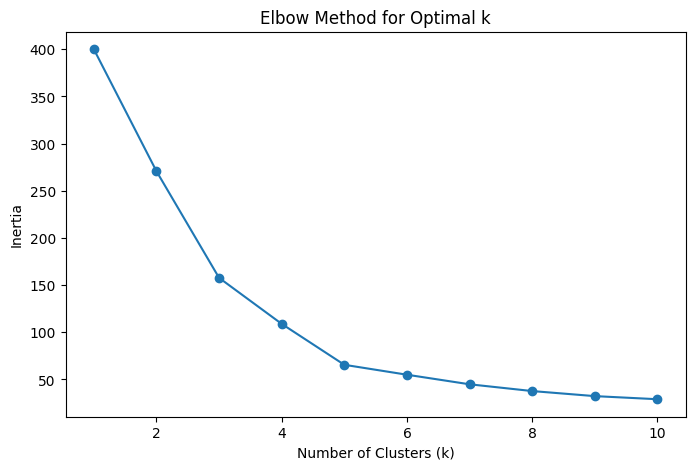

In [ ]:
#Elbow Methord
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k , random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

#Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11) , inertia_values , marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


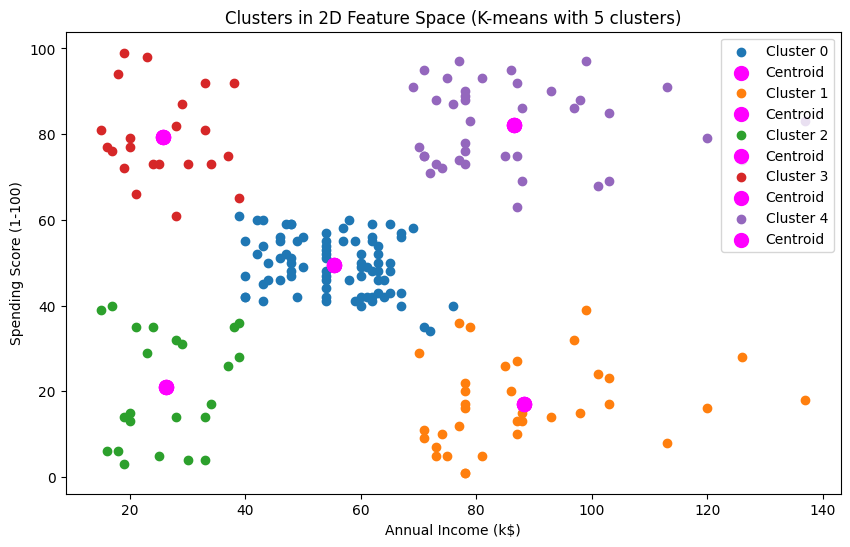

Cluster Profiles:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        41.114286           88.200000               17.114286
2        45.217391           26.304348               20.913043
3        25.272727           25.727273               79.363636
4        32.692308           86.538462               82.128205


<ipython-input-15-2607026696cd>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = df.groupby('Cluster').mean()[features]


In [ ]:
#Optimal number of cluster
optimal_k = 5

#KMeans Clustering
kmeans = KMeans(n_clusters = optimal_k , random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

#Plot
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')
    plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: , 1] , s=100 , c = 'magenta' , label = 'Centroid')
plt.title(f'Clusters in 2D Feature Space (K-means with {optimal_k} clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#Profile
cluster_profiles = df.groupby('Cluster').mean()[features]
print('Cluster Profiles:')
print(cluster_profiles)